In [1]:
%matplotlib notebook
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

road = ctrl.Antecedent(np.arange(1, 6, 1), 'road')
speed = ctrl.Antecedent(np.arange(1, 22, 1), 'speed')
acceleration = ctrl.Consequent(np.arange(-1, 2, 1), 'acceleration')

road.automf(names=['bad', 'normal', 'good'])
speed.automf(names=['slow', 'average', 'fast'])
acceleration.automf(names=['brake', 'maintain', 'accelerate'])

<IPython.core.display.Javascript object>


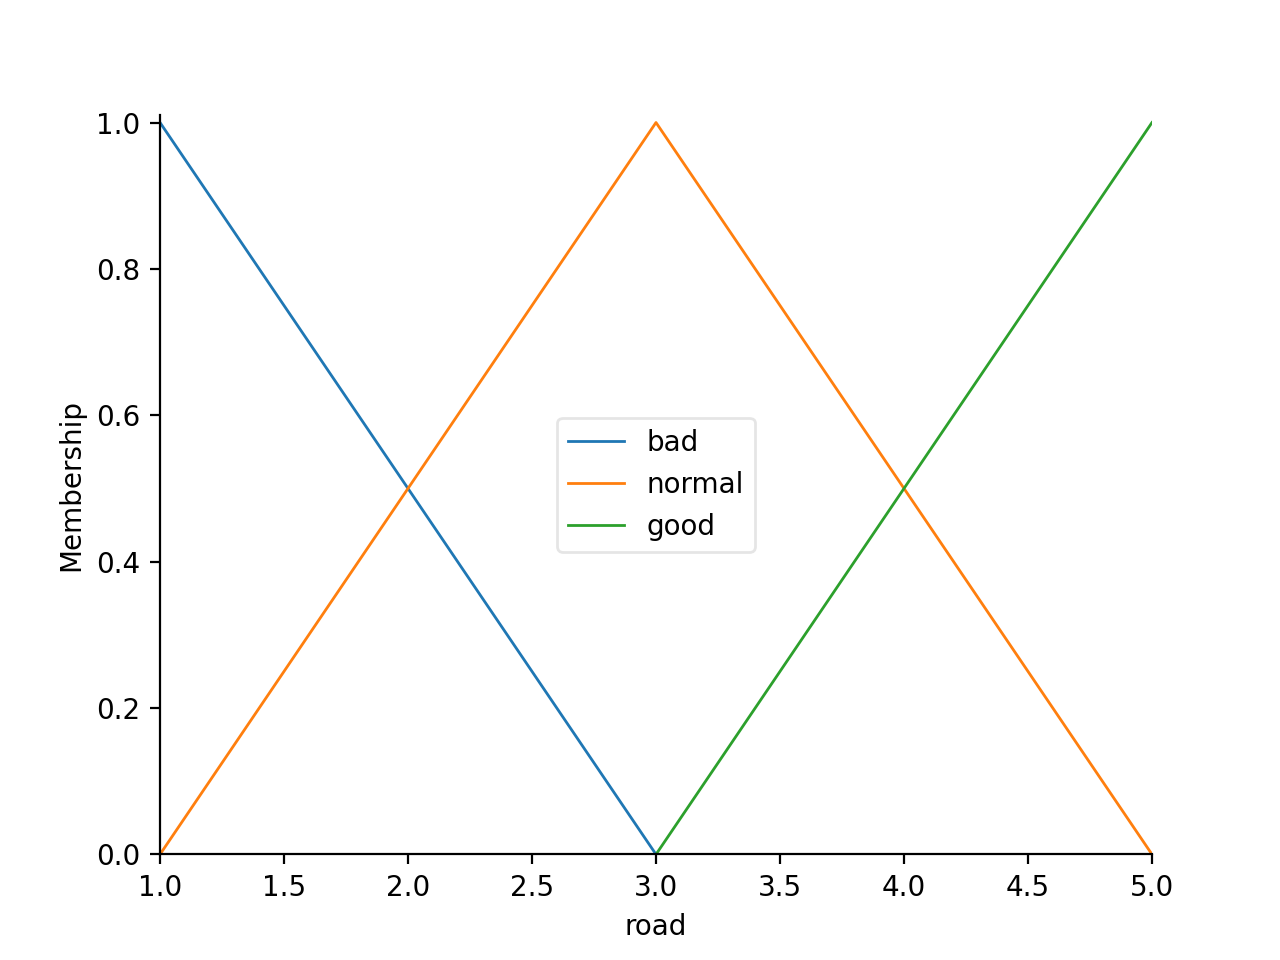

In [2]:
road.view()

<IPython.core.display.Javascript object>


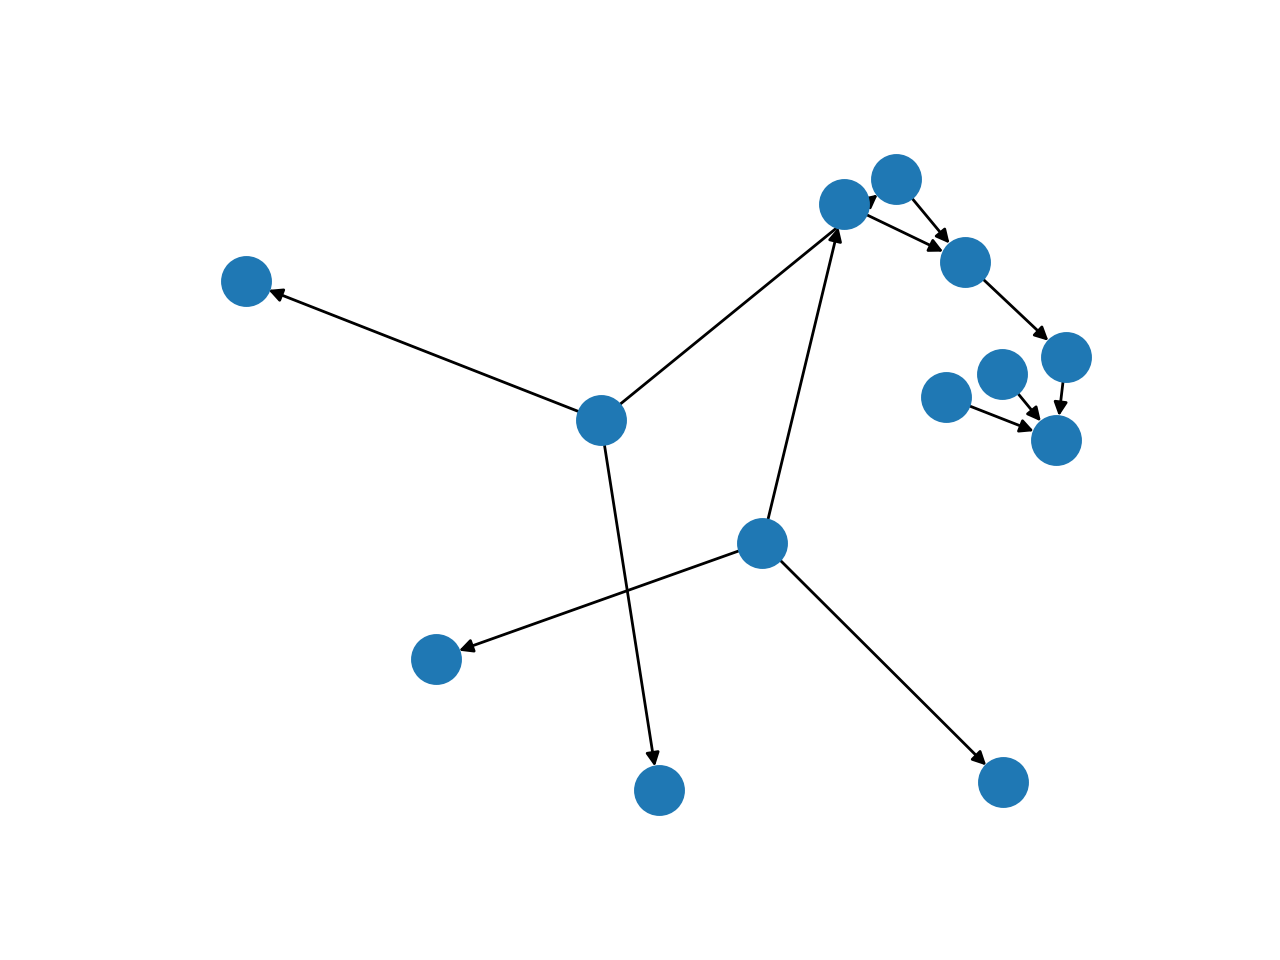

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [3]:
rule1 = ctrl.Rule(road['bad'] | speed['fast'], acceleration['brake'])
rule2 = ctrl.Rule(road['good'] | speed['slow'], acceleration['accelerate'])
rule3 = ctrl.Rule(road['normal'] & speed['fast'], acceleration['maintain'])
rule4 = ctrl.Rule(road['normal'] & speed['average'], acceleration['maintain'])
rule5 = ctrl.Rule(road['good'] & speed['average'], acceleration['accelerate'])

rule5.view()

In [4]:
bicycle_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
bicycle = ctrl.ControlSystemSimulation(bicycle_ctrl)

In [9]:
bicycle.input['road'] = 3
bicycle.input['speed'] = 15
bicycle.compute()
print(bicycle.output)

OrderedDict([('acceleration', -0.10000000000000002)])


<IPython.core.display.Javascript object>


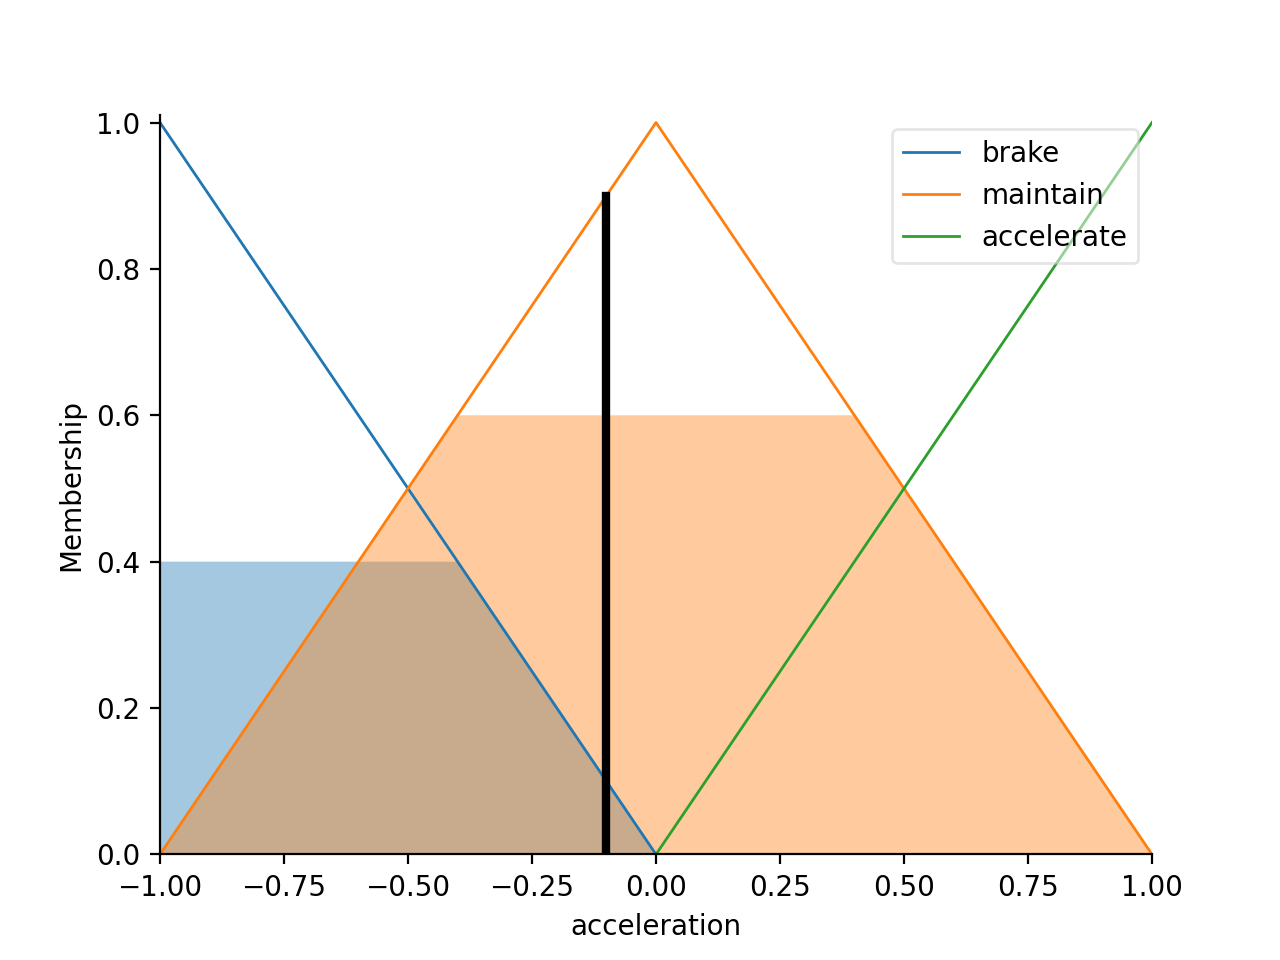

In [8]:
acceleration.view(sim=bicycle)